In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('2000_tickets_19.csv')
df.head(5)

,Case Owner,Subject,Ticket Status,Date/Time Opened,Closed Date,Age (Days),Open,Closed,Email Subject,Email Status,Email Message Date,Account Name,Link to Wrike
0,Adria Doescher,Period Selection,NaN,1/2/2019 10:09,1/21/2019,19,0,1,RE: Period Selection [ ref:_00DG0CiJO._5001...,Replied,1/2/2019 11:46,NaN,NaN
1,Adria Doescher,Period Selection,NaN,1/2/2019 10:09,1/21/2019,19,0,1,RE: Period Selection [ ref:_00DG0CiJO._5001...,Replied,1/2/2019 11:48,NaN,NaN
2,Adria Doescher,Period Selection,NaN,1/2/2019 10:09,1/21/2019,19,0,1,Period Selection,Replied,1/2/2019 10:12,NaN,NaN
3,Adria Doescher,Period Selection,NaN,1/2/2019 10:09,1/21/2019,19,0,1,RE: Period Selection [ ref:_00DG0CiJO._5001...,Sent,1/21/2019 7:15,NaN,NaN
4,Adria Doescher,Period Selection,NaN,1/2/2019 10:09,1/21/2019,19,0,1,"Power Factors, LLC Case No:- 00047535: Period...",Sent,1/2/2019 10:09,NaN,NaN


In [2]:
df['Age (Days)'].mean()

23.230198019801982

In [8]:
df['Age'] = df['Age (Days)']

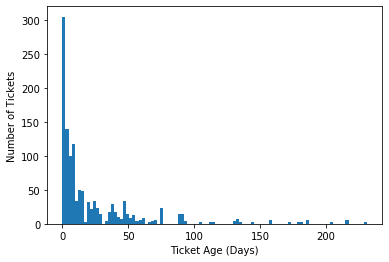

In [25]:
y = df['Age']
plt.hist(y, bins=100)
plt.ylabel('Number of Tickets')
plt.xlabel('Ticket Age (Days)')
plt.show()

In [10]:
df['Age (Days)'].std()

36.43963566900615

In [11]:
df['Age (Days)'].median()

8.0

In [23]:
df['Kiosk'] = df['Subject'].str.contains("Kiosk") | df['Email Subject'].str.contains("Kiosk") 

In [24]:
df['Kiosk'].value_counts()

False    1115
True       97
Name: Kiosk, dtype: int64

In [26]:
df['Corvius'] = df['Subject'].str.contains("Riley") | df['Email Subject'].str.contains("Meade") | df['Subject'].str.contains("Edwards") | df['Email Subject'].str.contains("APG")  

In [27]:
df['Corvius'].value_counts()

False    1119
True       93
Name: Corvius, dtype: int64

In [30]:
df.nlargest(10,'Age')

,Case Owner,Subject,Ticket Status,Date/Time Opened,Closed Date,Age (Days),Open,Closed,Email Subject,Email Status,Email Message Date,Account Name,Link to Wrike,Age,Kiosk,Corvius
10,Todd Hendricks,SMA Cluster Controller API,NaN,1/3/2019 10:14,8/22/2019,231,0,1,SMA Cluster Controller API,Read,1/3/2019 10:17,NaN,NaN,231,False,False
11,Todd Hendricks,SMA Cluster Controller API,NaN,1/3/2019 10:14,8/22/2019,231,0,1,"Power Factors, LLC Case No:- 00047578: SMA Cl...",Sent,1/3/2019 10:14,NaN,NaN,231,False,False
75,Adria Doescher,Report Names,NaN,2/20/2019 12:44,9/25/2019,217,0,1,"Power Factors, LLC Case No:- 00049068: Report ...",Sent,2/20/2019 12:44,NaN,NaN,217,False,False
1125,Adria Doescher,Report Names,NaN,2/20/2019 12:44,9/25/2019,217,0,1,RE: Report Names[ref:_00DG0CiJO._5001M1IVsCo:ref],New,9/25/2019 5:49,NaN,NaN,217,False,False
1126,Adria Doescher,Report Names,NaN,2/20/2019 12:44,9/25/2019,217,0,1,RE: Report Names[ref:_00DG0CiJO._5001M1IVsCo:ref],New,9/25/2019 6:55,NaN,NaN,217,False,False
1127,Adria Doescher,Report Names,NaN,2/20/2019 12:44,9/25/2019,217,0,1,Report Names,Replied,2/20/2019 12:43,NaN,NaN,217,False,False
1128,Adria Doescher,Report Names,NaN,2/20/2019 12:44,9/25/2019,217,0,1,RE: Report Names [ ref:_00DG0CiJO._5001M1IV...,Sent,2/20/2019 13:05,NaN,NaN,217,False,False
1087,Adria Doescher,RE: 15 min intervals,NaN,1/29/2019 9:55,8/22/2019,205,0,1,RE: 15 min intervals,Read,1/29/2019 9:55,"Power Factors, LLC",NaN,205,False,False
1088,Adria Doescher,RE: 15 min intervals,NaN,1/29/2019 9:55,8/22/2019,205,0,1,"Power Factors, LLC Case No:- 00048295: RE: 15...",Sent,1/29/2019 9:55,"Power Factors, LLC",NaN,205,False,False
248,Danica Pedraja,Ranked List Selection Functionality,NaN,5/15/2019 15:05,NaN,187,1,0,RE: Ranked List Selection Functionality (ref:_...,New,5/16/2019 7:23,NaN,NaN,187,False,False


In [35]:
outliers = df[df['Age'] > 14]

In [37]:
outliers['Corvius'].value_counts()

False    392
True      42
Name: Corvius, dtype: int64

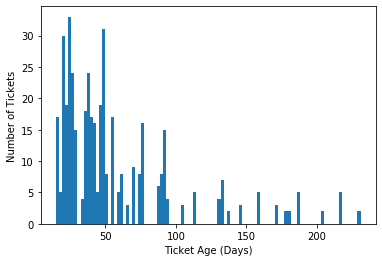

In [38]:
y = outliers['Age']
plt.hist(y, bins=100)
plt.ylabel('Number of Tickets')
plt.xlabel('Ticket Age (Days)')
plt.show()

In [39]:
df.shape

(1212, 16)

In [41]:
corvius = df[df['Corvius'] == True]

In [43]:
corvius['Age'].mean()

20.70967741935484

In [44]:
corvius['Age'].std()

23.655857186807598